In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('churn.csv')

df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [16]:
df.shape

(3150, 14)

In [29]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

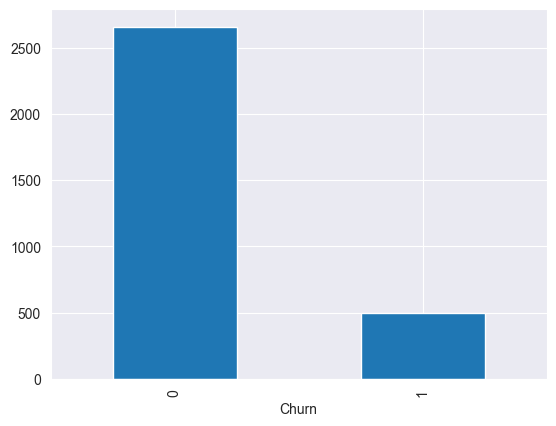

In [17]:
df.Churn.value_counts().plot(kind="bar")

In [18]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [19]:
X = df.drop("Churn", axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.78      0.40      0.53        99

    accuracy                           0.89       630
   macro avg       0.84      0.69      0.74       630
weighted avg       0.88      0.89      0.87       630



In [21]:
y_train.value_counts()

Churn
0    2124
1     396
Name: count, dtype: int64

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_run, y_train_run = rus.fit_resample(X_train, y_train)
y_train_run.value_counts()

Churn
0    396
1    396
Name: count, dtype: int64

In [23]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_run, y_train_run)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.819047619047619
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       531
           1       0.46      0.85      0.60        99

    accuracy                           0.82       630
   macro avg       0.71      0.83      0.74       630
weighted avg       0.89      0.82      0.84       630



In [24]:
# import SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

In [25]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8095238095238095
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.44      0.85      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.88      0.81      0.83       630



In [26]:
from imblearn.combine import SMOTETomek

smote_enn = SMOTETomek(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

y_train_smoteenn.value_counts()

Churn
0    2091
1    2091
Name: count, dtype: int64

In [27]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smoteenn, y_train_smoteenn)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8111111111111111
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.89      0.81      0.83       630



In [32]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred.round()), 'X_train')
# print(classification_report(y_test, y_pred.round()))

print('-'*50)

model = XGBRegressor()
model.fit(X_train_run, y_train_run)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred.round()), 'X_train_run')
# print(classification_report(y_test, y_pred.round()))

print('-'*50)

model = XGBRegressor()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred.round()), 'X_train_smote')
# print(classification_report(y_test, y_pred.round()))

print('-'*50)

model = XGBRegressor()
model.fit(X_train_smoteenn, y_train_smoteenn)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred.round()), 'X_train_smoteenn')
# print(classification_report(y_test, y_pred.round()))

0.9650793650793651 X_train
--------------------------------------------------
0.9047619047619048 X_train_run
--------------------------------------------------
0.9412698412698413 X_train_smote
--------------------------------------------------
0.9412698412698413 X_train_smoteenn


In [39]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import cross_val_score

print((cross_val_score(XGBRegressor(), X, y, cv=skf)))

[0.72942984 0.74243391 0.73926544 0.76782691 0.68595654]


In [40]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import cross_val_score

print((cross_val_score(XGBRegressor(), X_train_smoteenn, y_train_smoteenn, cv=skf)))

[0.89478451 0.88826126 0.88438076 0.9039169  0.91511261]


In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import cross_val_score

print((cross_val_score(XGBClassifier(), X_train_smoteenn, y_train_smoteenn, cv=skf)))

[0.97371565 0.97491039 0.97009569 0.97966507 0.97966507]


In [43]:
df = pd.read_csv("breast_cancer_data.csv")

df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [44]:
df.shape

(286, 10)

In [45]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

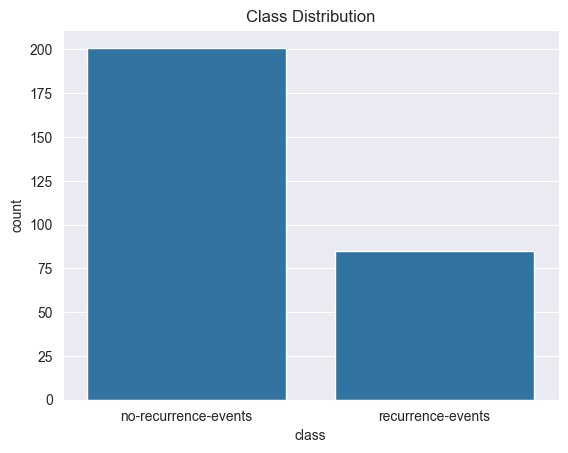

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [47]:
df['class'].value_counts()

class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

In [48]:
df = pd.get_dummies(df, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)

df.head()

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [49]:
X = df.drop("class", axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7068965517241379
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



In [51]:
rus = RandomUnderSampler(random_state=42)
X_train_run, y_train_run = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_run, y_train_run)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5862068965517241
                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.54      0.65        41
   recurrence-events       0.39      0.71      0.50        17

            accuracy                           0.59        58
           macro avg       0.60      0.62      0.57        58
        weighted avg       0.69      0.59      0.60        58



In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6379310344827587
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



In [53]:
smote_enn = SMOTETomek(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smoteenn, y_train_smoteenn)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6379310344827587
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



In [96]:
df = pd.read_csv('churn.csv')

df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [97]:
X = df.drop("Churn", axis=1)
y = df['Churn']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import TomekLinks, NearMiss, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

# Define resampling methods
resampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "TomekLinks": TomekLinks(),
    "NearMiss": NearMiss(version=1),
    "EditedNearestNeighbours": EditedNearestNeighbours(),
    "SMOTETomek": SMOTETomek(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
}

# Store results
results = {}
accuracy_scores = {}

for name, sampler in resampling_methods.items():
    print(f"Processing with {name}...")

    # Step 1: Resample the training data
    if "Under" in name or isinstance(sampler, (TomekLinks, NearMiss, EditedNearestNeighbours)):
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Step 2: Train a Logistic Regression model
    model = LogisticRegression(max_iter=10000, random_state=42)
    model.fit(X_resampled, y_resampled)

    # Step 3: Evaluate the model
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = report
    accuracy_scores[name] = accuracy

# Print and compare results
# for method, report in results.items():
#     print(f"\nClassification Report for {method}:")
#     print(classification_report(y_test, model.predict(X_test)))

# Print and compare accuracy scores
for method, accuracy in accuracy_scores.items():
    print(f"\nAccuracy Score for {method}: {accuracy}")

# print highest accuracy model
max_accuracy_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nModel with highest accuracy: {max_accuracy_model} with accuracy of {accuracy_scores[max_accuracy_model]}")

Processing with SMOTE...
Processing with ADASYN...
Processing with RandomOverSampler...
Processing with TomekLinks...
Processing with NearMiss...
Processing with EditedNearestNeighbours...
Processing with SMOTETomek...
Processing with SMOTEENN...

Accuracy Score for SMOTE: 0.8095238095238095

Accuracy Score for ADASYN: 0.8047619047619048

Accuracy Score for RandomOverSampler: 0.8396825396825397

Accuracy Score for TomekLinks: 0.8857142857142857

Accuracy Score for NearMiss: 0.5031746031746032

Accuracy Score for EditedNearestNeighbours: 0.8857142857142857

Accuracy Score for SMOTETomek: 0.8111111111111111

Accuracy Score for SMOTEENN: 0.7746031746031746

Model with highest accuracy: TomekLinks with accuracy of 0.8857142857142857
